In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

**views** *Our service replies with recommendations* - in them we know which user we recommended what to and which group they were assigned to. And, of course, we know the moment in time when this happened..

**likes** *Data about likes* - in it we know which user liked which post, including the point in time when this happened.

In [2]:
views, likes = pd.read_csv("AB_test/views.csv"), pd.read_csv("AB_test/likes.csv")

In [48]:
views

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
1,146885,test,[1399 1076 797 7015 5942],1654030811
2,50948,test,[2315 3037 1861 6567 4093],1654030825
3,37703,test,[2842 1949 162 1588 6794],1654030826
4,14661,test,[2395 5881 5648 3417 673],1654030829
...,...,...,...,...
193290,158267,test,[1733 6834 4380 1915 1627],1655240340
193291,63527,control,[2454 191 3873 6404 1588],1655240347
193292,52169,test,[1368 1709 1616 798 5305],1655240354
193293,142402,test,[5895 6984 1978 6548 6106],1655240373


In [4]:
likes.head()

,user_id,post_id,timestamp
0,128381,4704,1654030804
1,146885,1399,1654030816
2,50948,2315,1654030828
3,14661,673,1654030831
4,37703,1588,1654030833


In [5]:
views[views.exp_group=='control'].shape[0], views[views.exp_group=='test'].shape[0]

(96378, 96917)

In [6]:
#Let's look at exp_group and check if there are users who are in both groups
common_users = set(views[views.exp_group=='control']['user_id']).intersection(set(views[views.exp_group=='test']['user_id']))

In [7]:
#find users that get into in both group test and control
common_users

{25623, 55788, 142283, 148670}

In [8]:
views[views.user_id.isin(common_users)].sort_values(by='user_id')

,user_id,exp_group,recommendations,timestamp
145119,25623,control,[3101 2130 3378 998 6071],1654936834
39787,25623,test,[1529 6456 1549 4870 4651],1654280154
158674,25623,test,[3106 2705 962 4876 6378],1655021971
87340,25623,test,[3775 3680 627 1800 1020],1654576014
133592,25623,test,[7042 5439 7185 3703 7128],1654864699
178457,55788,test,[2669 3922 4123 6220 3425],1655147577
117468,55788,test,[1174 4769 1487 5370 894],1654764129
39653,55788,test,[3747 6638 5214 2801 5740],1654279384
82515,55788,control,[4970 2990 4592 6611 5483],1654545938
100929,142283,control,[5603 4388 1450 6309 545],1654661140


In [9]:
#delite repeat users from group control (most likely get into was accidentally) 


In [10]:
#delite repeat users from group control (most likely get into was accidentally) 
views = views[~((views['exp_group']=='control') & (views['user_id'].isin(common_users)))]

In [11]:
#cheack balans quantity users in controll and in test
print(views[views.exp_group=='control'].shape[0], views[views.exp_group=='test'].shape[0])
set(views[views.exp_group=='control']['user_id']).intersection(set(views[views.exp_group=='test']['user_id']))

96370 96917


set()

In [12]:
#amount unique users that we did recommendation
len(set(views.user_id))

65013

In [13]:
#amount unique users that liked
len(set(likes.user_id).intersection(set(views.user_id)))

58171

In [14]:
# Views to likes ratio
round(len(set(likes.user_id).intersection(set(views.user_id)))/len(set(views.user_id))*100,2)

89.48

In [15]:
# amount of likes for each user
likes_agg = likes \
    .groupby('user_id') \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'likes'})
likes_agg 

,likes
user_id,
200,1
201,3
202,2
212,4
213,7
...,...
168525,2
168532,4
168538,5


In [16]:
#unique users and their group controol or test 
group_views = views.groupby('user_id')['exp_group'].first().reset_index()
group_views

,user_id,exp_group
0,200,test
1,201,test
2,202,test
3,212,test
4,213,test
...,...,...
65008,168538,test
65009,168541,control
65010,168544,test
65011,168545,test


In [17]:
#join group_views with like for eache users 
view_likes_action = group_views.merge(likes_agg , how='left', on='user_id')

In [18]:
#fill the NaN with 0
view_likes_action = view_likes_action.fillna(0.0)
view_likes_action

,user_id,exp_group,likes
0,200,test,1.0
1,201,test,3.0
2,202,test,2.0
3,212,test,4.0
4,213,test,7.0
...,...,...,...
65008,168538,test,5.0
65009,168541,control,2.0
65010,168544,test,0.0
65011,168545,test,5.0


In [19]:
share_of_users_control = len(view_likes_action[(view_likes_action['exp_group']=='control')&(view_likes_action['likes']!=0)])/len(view_likes_action[(view_likes_action['exp_group']=='control')])

In [20]:
#test with like (one and more) 

share_of_users_control = len(view_likes_action[(view_likes_action['exp_group']=='control')&(view_likes_action['likes']!=0)])/len(view_likes_action[(view_likes_action['exp_group']=='control')])
share_of_users_test = len(view_likes_action[(view_likes_action['exp_group']=='test')&(view_likes_action['likes']!=0)])/len(view_likes_action[(view_likes_action['exp_group']=='test')])

In [21]:
#rate like of views(one and more ): control group and test group
share_of_users_control,share_of_users_test

(0.8913137557959815, 0.8981722438232863)

In [22]:
view_likes_action[(view_likes_action['exp_group']=='control')&(view_likes_action['likes']!=0)].likes

6        4.0
7        5.0
9        3.0
10       3.0
11       4.0
        ... 
64998    1.0
64999    3.0
65001    1.0
65005    2.0
65009    2.0
Name: likes, Length: 28834, dtype: float64

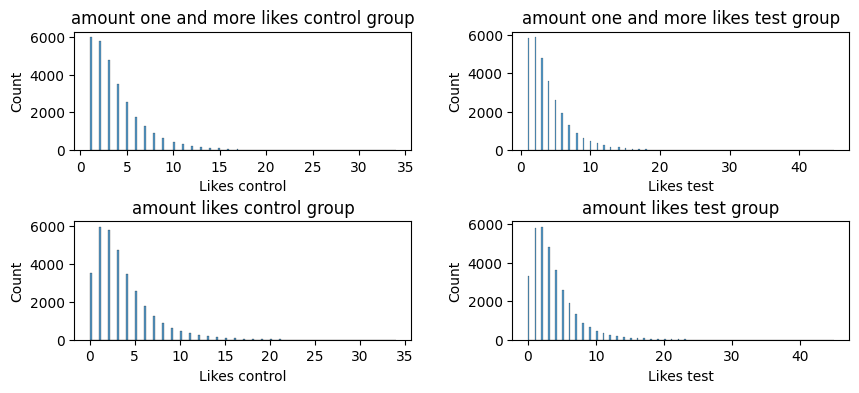

In [23]:
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('amount one and more likes control group')
sns.histplot(view_likes_action[(view_likes_action['exp_group']=='control')&(view_likes_action['likes']!=0)].likes)
plt.xlabel('Likes control')

ax2 = plt.subplot(2, 2, 2)
ax2.set_title('amount one and more likes test group')
sns.histplot(view_likes_action[(view_likes_action['exp_group']=='test')&(view_likes_action['likes']!=0)].likes)
plt.xlabel('Likes test')
plt.subplots_adjust(hspace=0.6, wspace=0.3)
ax3 = plt.subplot(2, 2, 3)
ax3.set_title('amount likes control group')
sns.histplot(view_likes_action[view_likes_action['exp_group']=='control'].likes)
plt.xlabel('Likes control')

ax4 = plt.subplot(2, 2, 4)
ax4.set_title('amount likes test group')
sns.histplot(view_likes_action[view_likes_action['exp_group']=='test'].likes)
plt.xlabel('Likes test')

plt.show()



In [24]:
from scipy.stats import mannwhitneyu

mannwhitneyu(
    x=view_likes_action[(view_likes_action['exp_group']=='control')&(view_likes_action['likes']!=0)].likes,
    y=view_likes_action[(view_likes_action['exp_group']=='test')&(view_likes_action['likes']!=0)].likes
)

MannwhitneyuResult(statistic=416619733.5, pvalue=0.001553463647547211)

In [25]:
from scipy.stats import mannwhitneyu

mannwhitneyu(
    x=view_likes_action[view_likes_action['exp_group']=='control'].likes,
    y=view_likes_action[view_likes_action['exp_group']=='test'].likes
)

MannwhitneyuResult(statistic=518368725.5, pvalue=2.6804547715312987e-05)

- let's accept level of statistical significance = 0.05- *Test and control groups are observe, because U - test = pvalue=2.68e-05 and  pvalue=0.0015
- Both metrics have statistically significantly improved, meaning there are more likesd

#### hitrate

In [118]:
tmp = pd.merge(views, likes, on='user_id', how='outer')
tmp.post_id = tmp.post_id.fillna(-1).astype(int)

tmp.recommendations = tmp.recommendations.astype(str)
tmp['recommendations'] = tmp.recommendations.apply(
    lambda x: list(map(int, filter(bool, x[1:-1].split(' '))))
)

tmp.sample(5)[['post_id','recommendations']]
tmp.post_id = tmp.apply(
    lambda row:
    -1
    if
        (row.post_id == -1) | 
        ((row.timestamp_x > row.timestamp_y) |
        (row.timestamp_x + 60 * 60 < row.timestamp_y)) |
        (row.post_id not in row.recommendations)
    else
    row.post_id, axis=1
)

tmp.sample(5)[['post_id','recommendations']]
def agg_hitrate(values):
    values = set(values)
    if -1 in values and len(values) >= 2:
        return 1
    elif -1 not in values:
        return 1
    return 0

tmp_agg = (
    tmp.groupby(['user_id', 'exp_group', 'timestamp_x'])
    .post_id.agg(agg_hitrate)
)
tmp_agg = tmp_agg.reset_index().rename(
    columns={'post_id': 'hitrate'}
)

print('Getting Hitrate...')
hitrate_score = tmp_agg.hitrate.mean()
hitrate_score

Getting Hitrate...


0.7132657654161946